- 필수확인
- 기본정보(나이, 연령, 성별)에 따른 금연 성공 상관 관계
- 차상위 계층 등 가구조사에 따른 흡연율 상관 관계

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = r'C:\Windows\Fonts\HMFMMUEX.TTC'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

from modules.columns import cols, code_maps
usecols = list(cols.keys())

# 기본정보/가구정보 컬럼만 데이터 로드
filepath = "../../data/analy_data.csv"
data = pd.read_csv(filepath, usecols=usecols, encoding="utf-8")

# object 
data['EXAMIN_YEAR'] = data['EXAMIN_YEAR'].apply(lambda x: x.split("'")[1])
data['exmprs_no'] = data['exmprs_no'].apply(lambda x: x.split("'")[1])
data['CTPRVN_CODE'] = data['CTPRVN_CODE'].apply(lambda x: x.split("'")[1])
data['PBHLTH_CODE'] = data['PBHLTH_CODE'].apply(lambda x: x.split("'")[1])
data['SPOT_NO'] = data['SPOT_NO'].apply(lambda x: x.split("'")[1])
data['HSHLD_CODE'] = data['HSHLD_CODE'].apply(lambda x: x.split("'")[1])
data['MBHLD_CODE'] = data['MBHLD_CODE'].apply(lambda x: x.split("'")[1])
data['DONG_TY_CODE'] = data['DONG_TY_CODE'].apply(lambda x: x.split("'")[1])
data['HOUSE_TY_CODE'] = data['HOUSE_TY_CODE'].apply(lambda x: x.split("'")[1])
data['signgu_code'] = data['signgu_code'].apply(lambda x: x.split("'")[1])
data['kstrata'] = data['kstrata'].apply(lambda x: x.split("'")[1])
data['sex'] = data['sex'].apply(lambda x: 1 if x == 1 else 2).astype(str)
data['churn'] = data['churn'].astype(str)

type_convert = ['fma_19z3','fma_04z1','fma_12z1','fma_24z2','nue_01z1','fma_27z1','fma_26z1']
for col in type_convert:
    data[col] = data[col].apply(lambda x: str(int(x)) if pd.notnull(x) and float(x).is_integer() else str(x))

num_df = data.select_dtypes(include=['int64', 'float64'])
obj_df = data.select_dtypes(include=['object'])

print("데이터 크기:", data.shape)
print("수치형 변수 개수:", len(num_df.columns))
print("범주형 변수 개수:", len(obj_df.columns))

데이터 크기: (89822, 27)
수치형 변수 개수: 7
범주형 변수 개수: 20


### 수치형 변수

,age,wt_h,wt_p,mbhld_co,reside_adult_co,fma_13z1,fma_14z1
count,89822.000000,89822.000000,89822.000000,89822.000000,89822.000000,89822.000000,89822.000000
mean,56.454454,162.632419,196.463480,2.416357,2.144252,74968.515865,16699.711752
std,16.196991,130.031028,173.320939,1.133535,0.884861,31077.774696,34374.276411
min,19.000000,7.000000,6.281900,1.000000,1.000000,0.000000,0.000000
25%,45.000000,47.814820,57.827160,2.000000,2.000000,88888.000000,200.000000
50%,58.000000,135.764780,150.605580,2.000000,2.000000,88888.000000,400.000000
75%,68.000000,247.947680,285.559790,3.000000,2.000000,88888.000000,800.000000
max,102.000000,1397.930470,1890.404270,10.000000,8.000000,99999.000000,99999.000000


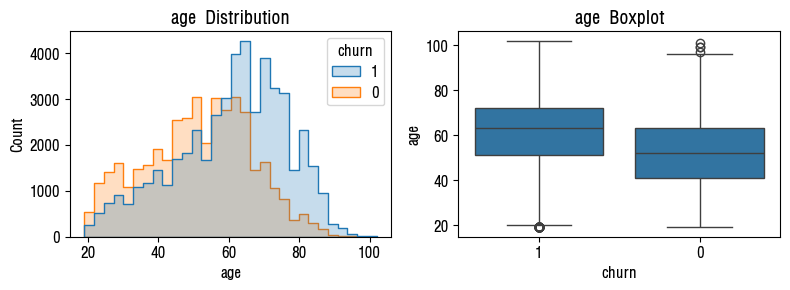

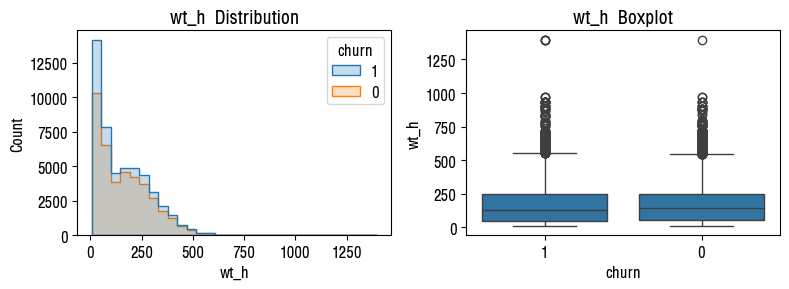

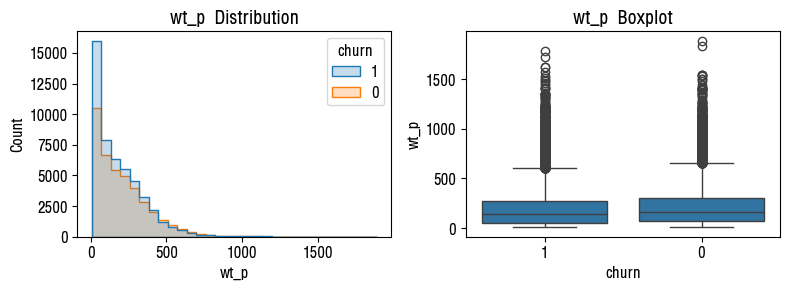

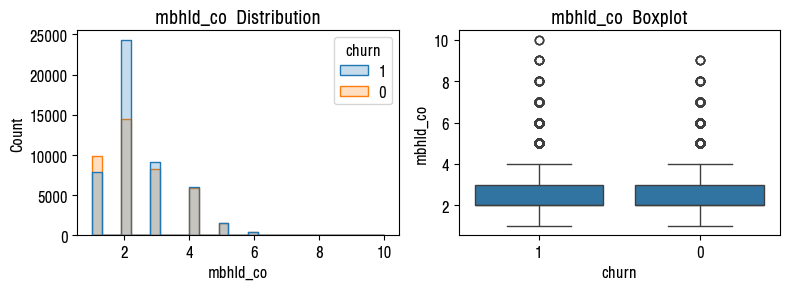

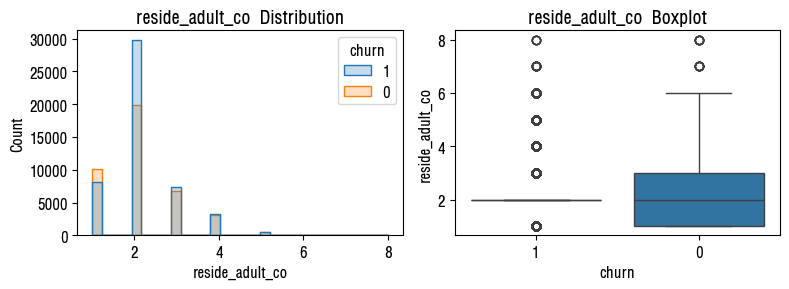

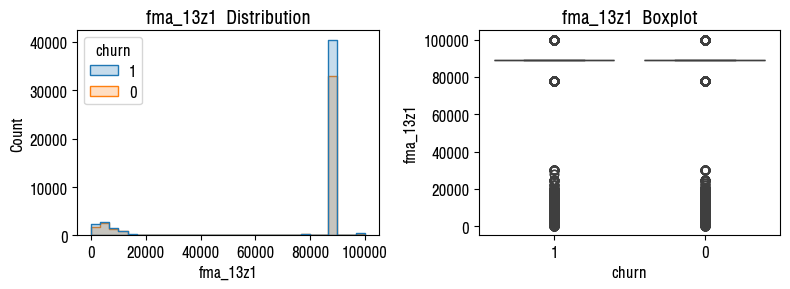

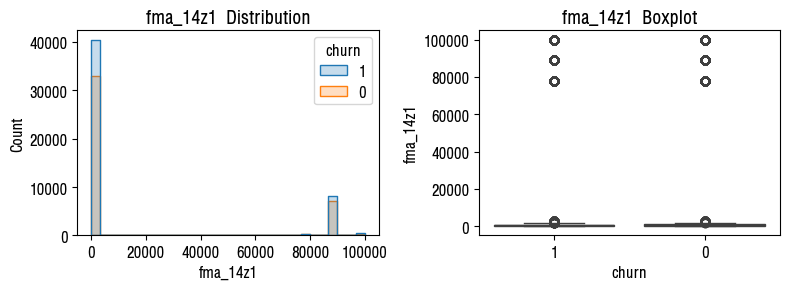

In [4]:
# 기술 통계
display(num_df.describe())

# 분포 확인
for col in num_df.columns:
    plt.figure(figsize=(8, 3))
    plt.subplot(1, 2, 1)
    
    sns.histplot(data=data, x=col, hue='churn', bins=30, element='step')
    plt.title(f'{col} Distribution')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data=data, x='churn', y=col)

    plt.title(f'{col} Boxplot')
    plt.tight_layout()
    plt.show()

In [5]:
num_df.isnull().sum()

age                0
wt_h               0
wt_p               0
mbhld_co           0
reside_adult_co    0
fma_13z1           0
fma_14z1           0
dtype: int64

mbhld_co_iqr >>> Q1: 2.0, Q3: 3.0, IQR: 1.0, Upper Bound: 4.0


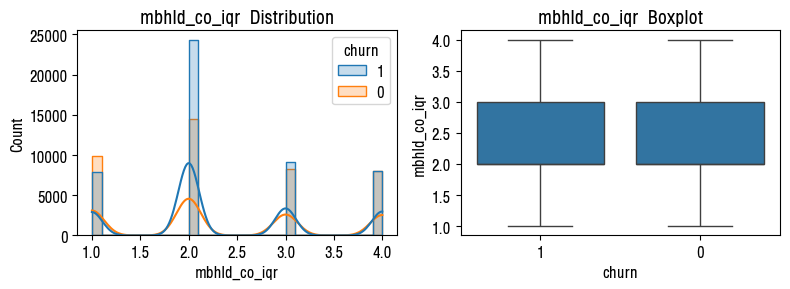

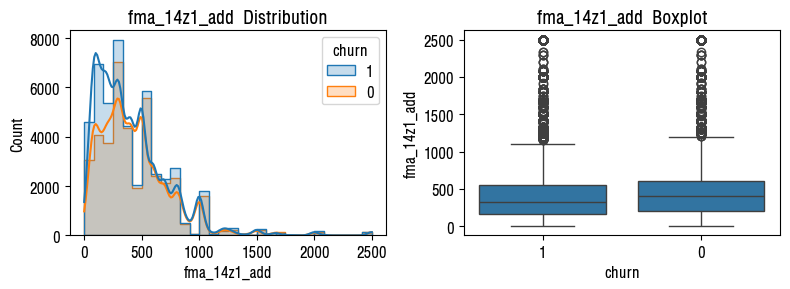

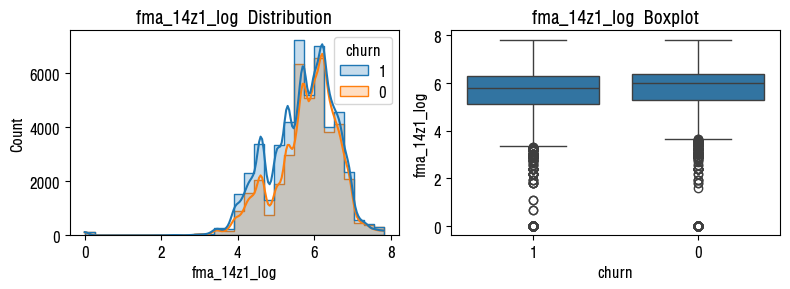

In [6]:
# num_df['mbhld_co'].value_counts()
# mbhld_co
# 2.0     38750
# 1.0     17671
# 3.0     17320
# 4.0     11922
# 5.0      3068
# 6.0       833
# 7.0       198
# 8.0        44
# 9.0        13
# 10.0        3

# num_df['reside_adult_co'].value_counts()
# reside_adult_co
# 2.0    49665
# 1.0    18275
# 3.0    14166
# 4.0     6376
# 5.0     1101
# 6.0      196
# 7.0       31
# 8.0       12

def hist_boxplot(df, col):
    plt.figure(figsize=(8, 3))
    plt.subplot(1, 2, 1)
    
    sns.histplot(data=df, x=col, hue='churn', bins=30, kde=True, element='step')
    plt.title(f'{col} Distribution')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x='churn', y=col)

    plt.title(f'{col} Boxplot')
    plt.tight_layout()
    plt.show()

def outliers_iqr(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper =  np.floor(q3 + 1.5 * iqr)
    new_col = f'{col}_iqr'
    df[new_col] = np.where(df[col] > upper, upper, df[col])
    print(f'{new_col} >>> Q1: {q1}, Q3: {q3}, IQR: {iqr}, Upper Bound: {upper}')
    return df

data = outliers_iqr(data, 'mbhld_co') # Upper Bound: 4.0
# num_df = outliers_iqr(num_df, 'reside_adult_co') # Upper Bound: 2.0 -> 너무 작게 잡혀서 제외 -> 1인 성인가구 vs 그 외
hist_boxplot(data, 'mbhld_co_iqr') # mbhld_co > iqr 기준 가구규모 범주화

# 연간/월간 가구총소득 결측치 처리 (77777 = 응답거부, 99999 = 모름 → NaN으로 변환)
data['fma_13z1'] = data['fma_13z1'].replace({77777: np.nan, 88888:np.nan, 99999: np.nan})
data['fma_14z1'] = data['fma_14z1'].replace({77777: np.nan, 88888:np.nan, 99999: np.nan})

# num_df[(num_df['fma_13z1'].isnull()==True) & (num_df['fma_14z1'].isnull()==True)] # 둘다없음 1346 (1.4%) 삭제고려
# num_df[(num_df['fma_13z1'].isnull()==True) & (num_df['fma_14z1'].isnull()==False)] # 연간소득없음 73318건 (78%)
# num_df[(num_df['fma_13z1'].isnull()==False) & (num_df['fma_14z1'].isnull()==True)] # 월간소득없음 15158건 (16%)

# 대부분 월 단위로 응답 -> 월간소득 기준 컬럼 통합
data['fma_14z1_add'] = data['fma_14z1'] 
data['fma_14z1_add'] = round(data['fma_14z1_add'].fillna(data['fma_13z1'] / 12))

# display(data.isnull().sum())
hist_boxplot(data, 'fma_14z1_add') 

data['fma_14z1_log'] = np.log1p(data['fma_14z1_add'])
hist_boxplot(data, 'fma_14z1_log')

### 범주형 변수


[EXAMIN_YEAR]
nunique: 1
missing: 0(0.00%)
EXAMIN_YEAR
2024    89822
Name: count, dtype: int64


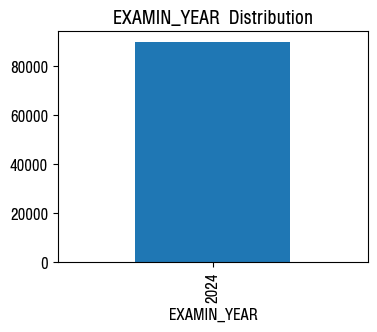


[exmprs_no]
nunique: 89822
missing: 0(0.00%)

[sex]
nunique: 2
missing: 0(0.00%)
sex
1    79529
2    10293
Name: count, dtype: int64


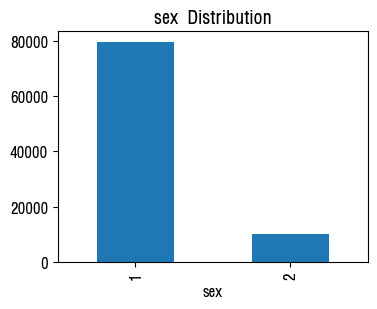


[CTPRVN_CODE]
nunique: 17
missing: 0(0.00%)
CTPRVN_CODE
41    17666
47     8358
11     8265
46     7009
48     6850
42     6580
26     5461
44     5408
43     5218
45     4625
28     3645
27     3204
50     2014
31     1968
30     1690
29     1529
36      332
Name: count, dtype: int64


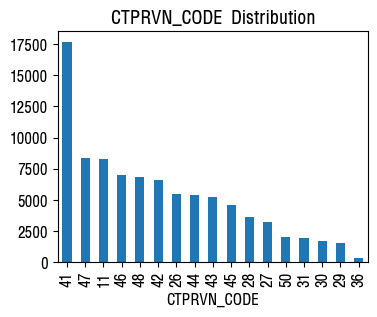


[PBHLTH_CODE]
nunique: 258
missing: 0(0.00%)

[SPOT_NO]
nunique: 5701
missing: 0(0.00%)

[HSHLD_CODE]
nunique: 897
missing: 0(0.00%)

[MBHLD_CODE]
nunique: 9
missing: 0(0.00%)
MBHLD_CODE
01    52838
02    28256
03     5901
04     2150
05      517
06      114
07       34
08       11
09        1
Name: count, dtype: int64


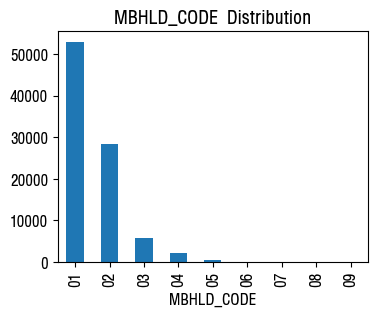


[DONG_TY_CODE]
nunique: 2
missing: 0(0.00%)
DONG_TY_CODE
1    50867
2    38955
Name: count, dtype: int64


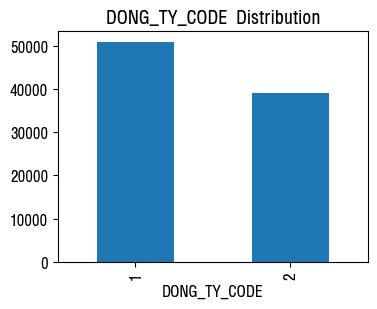


[HOUSE_TY_CODE]
nunique: 2
missing: 0(0.00%)
HOUSE_TY_CODE
1    49327
2    40495
Name: count, dtype: int64


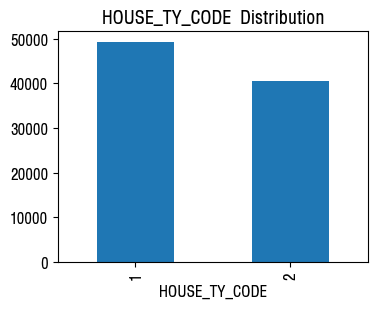


[signgu_code]
nunique: 252
missing: 0(0.00%)

[kstrata]
nunique: 5719
missing: 0(0.00%)

[fma_19z3]
nunique: 9
missing: 0(0.00%)
fma_19z3
2     32223
4     26082
1     17232
5      4748
6      4276
7      3669
3      1552
99       39
77        1
Name: count, dtype: int64


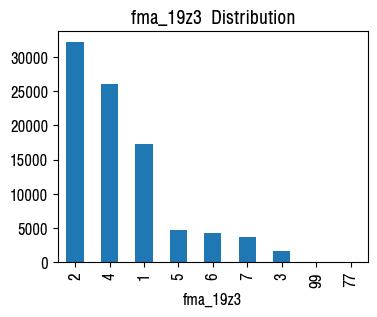


[fma_04z1]
nunique: 5
missing: 0(0.00%)
fma_04z1
3    84401
1     4944
2      456
9       19
7        2
Name: count, dtype: int64


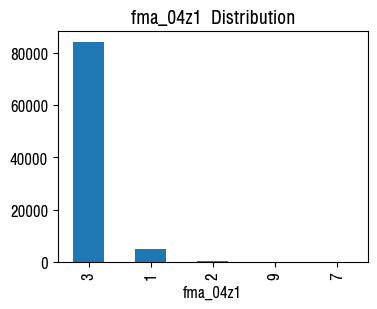


[fma_12z1]
nunique: 4
missing: 0(0.00%)
fma_12z1
2    73318
1    15158
9      824
7      522
Name: count, dtype: int64


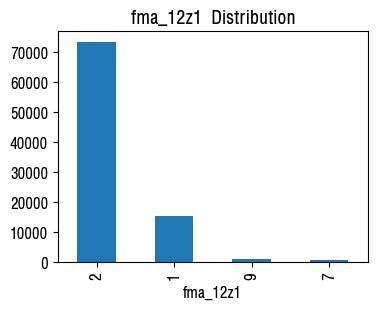


[fma_24z2]
nunique: 11
missing: 0(0.00%)
fma_24z2
88    88476
8       294
4       163
77      143
5       141
3       127
6       125
2       115
99      108
7        75
1        55
Name: count, dtype: int64


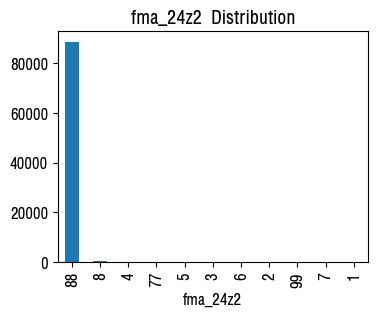


[nue_01z1]
nunique: 6
missing: 0(0.00%)
nue_01z1
1    61689
2    23467
3     3815
4      829
7       11
9       11
Name: count, dtype: int64


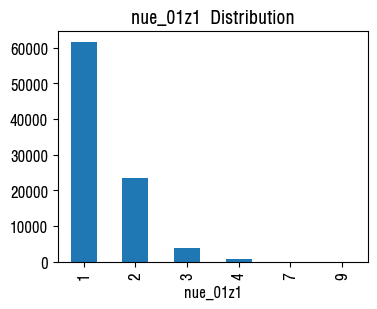


[fma_27z1]
nunique: 4
missing: 0(0.00%)
fma_27z1
2    79843
1     9954
9       23
7        2
Name: count, dtype: int64


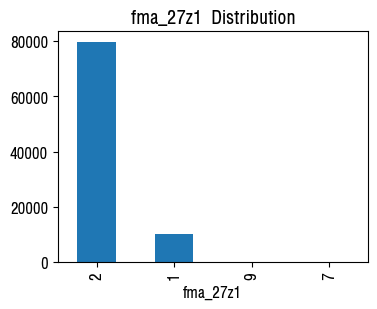


[fma_26z1]
nunique: 5
missing: 0(0.00%)
fma_26z1
8    79843
2     8509
1     1445
9       23
7        2
Name: count, dtype: int64


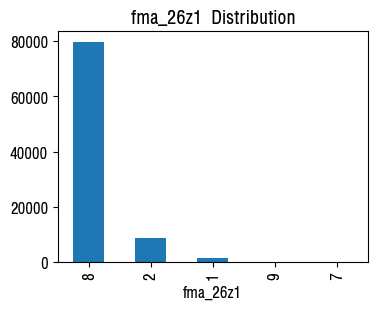


[churn]
nunique: 2
missing: 0(0.00%)
churn
1    49251
0    40571
Name: count, dtype: int64


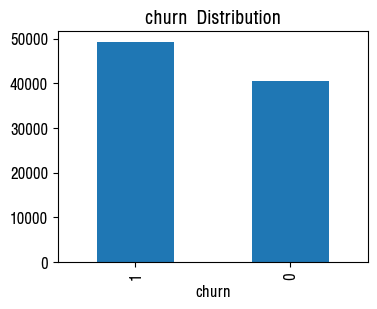

In [7]:
total_rows = len(obj_df)

for col in obj_df.columns:    
    print(f"\n[{col}]")
    print(f"nunique: {obj_df[col].nunique()}")
    print(f"missing: {obj_df[col].isna().sum()}({obj_df[col].isna().sum()/total_rows:.2%})")

    if obj_df[col].nunique() < 20:
        print(obj_df[col].value_counts())
        plt.figure(figsize=(4, 3))
        obj_df[col].value_counts().plot(kind='bar')
        plt.title(f'{col} Distribution')
        plt.show()

    print('====='*10)

### 상관관계

In [8]:
data['churn'] = data['churn'].astype(int)
df = data.copy()

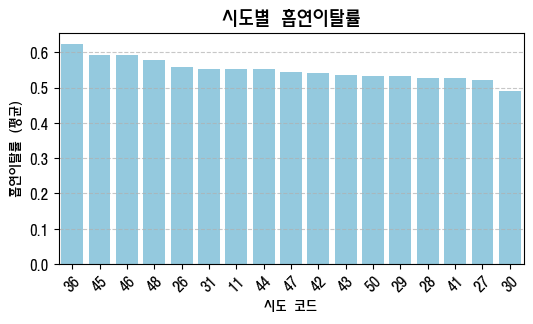

In [9]:
# 지역별 금연성공률(흡연이탈률) 차이
h1 = (
    df.groupby('CTPRVN_CODE')['churn']
      .agg(['count','sum','mean'])
      .rename(columns={'count':'전체','sum':'흡연이탈','mean':'흡연이탈률'})
      .sort_values('흡연이탈률', ascending=False)
)

# weighted_rate = (
#     df.groupby("CTPRVN_CODE")
#       .apply(lambda x: (x["churn"] * x["wt_p"]).sum() / x["wt_p"].sum())
#       .reset_index(name="가중흡연이탈률")
# )

# h1 = h1.merge(weighted_rate, on="CTPRVN_CODE", how="left")

plt.figure(figsize=(6, 3))
sns.barplot(
    data=h1.reset_index(),
    x="CTPRVN_CODE", y="흡연이탈률",
    color="skyblue"
)
plt.xticks(rotation=45)
plt.title("시도별 흡연이탈률", fontsize=14)
plt.ylabel("흡연이탈률 (평균)")
plt.xlabel("시도 코드")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [10]:
# df.groupby(['CTPRVN_CODE','SPOT_NO']).count()
# df.groupby(['CTPRVN_CODE','SPOT_NO','HSHLD_CODE']).count()
# df.groupby(['CTPRVN_CODE','SPOT_NO','HSHLD_CODE','MBHLD_CODE']).count()

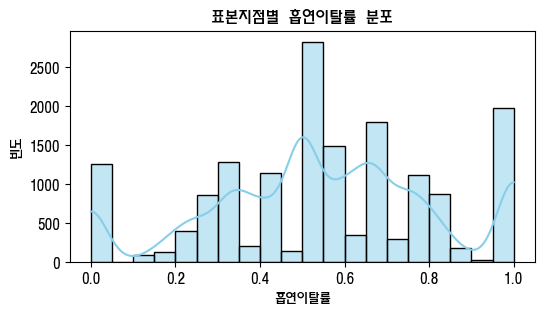

,흡연이탈률
count,16382.000000
mean,0.548257
std,0.270153
min,0.000000
25%,0.375000
50%,0.538462
75%,0.750000
max,1.000000


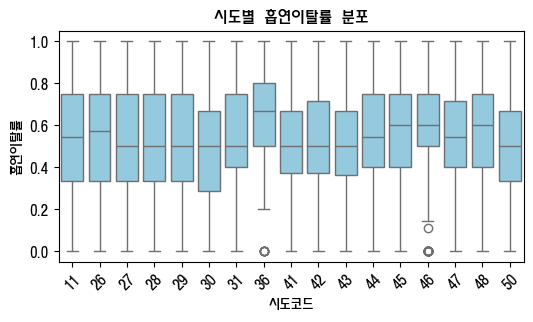

In [11]:
# 지역/표본지점별 흡연이탈률 패턴
h1 = (
    df.groupby(['CTPRVN_CODE', 'SPOT_NO'])['churn']
      .agg(['count', 'mean'])
      .rename(columns={'count': '전체', 'mean': '흡연이탈률'})
      .reset_index()
)

plt.figure(figsize=(6,3))
sns.histplot(h1['흡연이탈률'], bins=20, kde=True, color='skyblue')
plt.title('표본지점별 흡연이탈률 분포')
plt.xlabel('흡연이탈률')
plt.ylabel('빈도')
plt.show()

# 시도별-표본지점별 흡연이탈률 계산
cluster_stats = (
    df.groupby(['CTPRVN_CODE', 'SPOT_NO'])['churn']
      .mean()
      .reset_index()
      .rename(columns={'churn': '흡연이탈률'})
)

display(cluster_stats.describe()) 
plt.figure(figsize=(6,3))
sns.boxplot(x='CTPRVN_CODE', y='흡연이탈률', data=cluster_stats, color='skyblue')
plt.title('시도별 흡연이탈률 분포')
plt.xlabel('시도코드')
plt.ylabel('흡연이탈률')
plt.xticks(rotation=45)
plt.show()

# 표본지점별 흡연이탈률은 0.4~0.6에 집중되지만, 
# 지역 간 편차가 커서 지역적 요인이 흡연이탈률(금연성공률)에 실질적 영향을 줄 가능성이 높다.

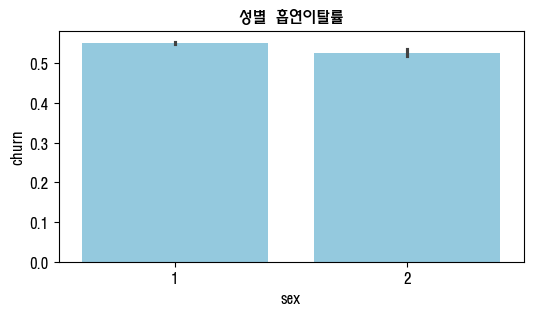

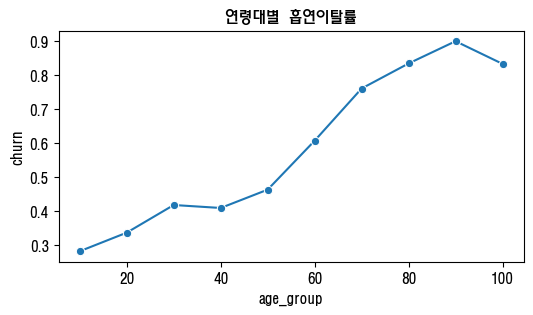

가중흡연이탈률: 0.517


In [12]:
# 연령, 성별, 가중치 관계
df['age_group'] = (df['age'] // 10) * 10

plt.figure(figsize=(6,3))
sns.barplot(data=df, x='sex', y='churn', color='skyblue')
plt.title('성별 흡연이탈률')
plt.show()

plt.figure(figsize=(6,3))
age_rate = df.groupby('age_group')['churn'].mean().reset_index()
sns.lineplot(data=age_rate, x='age_group', y='churn', marker='o')
plt.title('연령대별 흡연이탈률')
plt.show()

weighted_mean = np.average(df['churn'], weights=df['wt_p'])
print(f"가중흡연이탈률: {weighted_mean:.3f}")

# 금연성공률은 연령이 높을수록 뚜렷하게 상승하며, 성별 간 차이는 미미하다.

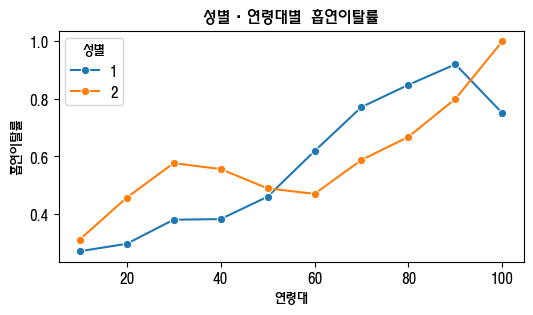

In [13]:
# 성별 × 연령대별 흡연이탈률 계산
age_sex_rate = (
    df.groupby(['sex', 'age_group'])['churn']
      .mean()
      .reset_index()
)

plt.figure(figsize=(6, 3))
sns.lineplot(
    data=age_sex_rate, 
    x='age_group', 
    y='churn', 
    hue='sex', 
    marker='o'
)
plt.title('성별·연령대별 흡연이탈률')
plt.xlabel('연령대')
plt.ylabel('흡연이탈률')
plt.legend(title='성별')
plt.show()

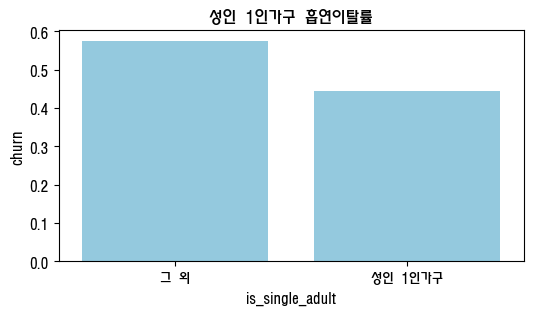

In [14]:
# 성인 1인가구에 따른 금연성공률?
df['is_single_adult'] = np.where((df['mbhld_co'] == 1) & (df['reside_adult_co'] == 1), 1, 0)
single_adult_rate = df.groupby('is_single_adult')['churn'].mean().reset_index()

plt.figure(figsize=(6,3))       
sns.barplot(data=single_adult_rate, x='is_single_adult', y='churn', color='skyblue')
plt.xticks([0, 1], ['그 외', '성인 1인가구'])
plt.title('성인 1인가구 흡연이탈률')
plt.show()
# 성인 1인가구의 흡연이탈률이 더 낮음

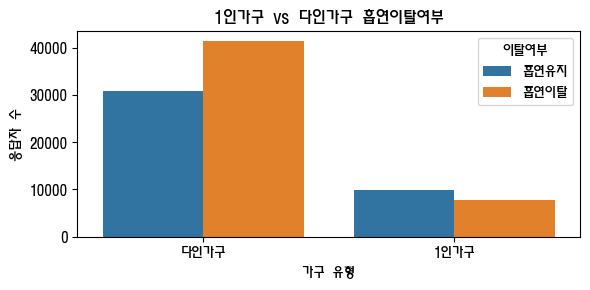

In [16]:
# 1인가구에 따른 금연성공률
df['is_single'] = np.where((df['mbhld_co'] == 1), 1, 0)

plt.figure(figsize=(6,3))  
sns.countplot(data=df, x='is_single', hue='churn')
plt.xticks([0, 1], ['다인가구', '1인가구'])
plt.xlabel('가구 유형')
plt.ylabel('응답자 수')
plt.title('1인가구 vs 다인가구 흡연이탈여부')

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['흡연유지', '흡연이탈'], title='이탈여부')

plt.tight_layout()
plt.show()

['0', '1']


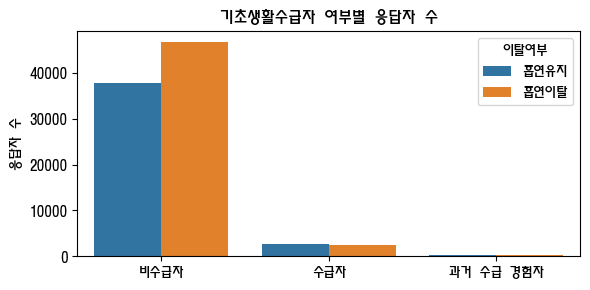

In [19]:
# 기초생활수급자 여부와 흡연이탈률
filtered_df = data[~data['fma_04z1'].isin(['7', '9'])]

label_map = {
    '1': '수급자',
    '2': '과거 수급 경험자', # 과거 수급 경험자 -> 비수급자로 통합 (응답자 수 적음 -> 이상치)
    '3': '비수급자'
}

filtered_df['fma_04z1'] = filtered_df['fma_04z1'].map(label_map)

# h1 = (
#     filtered_df.groupby('fma_04z1')['churn']
#     .mean()
#     .reset_index()
#     .rename(columns={'fma_04z1': '기초생활수급자여부', 'churn': '흡연이탈률'})
# )

# h1['기초생활수급자여부'] = h1['기초생활수급자여부'].map(label_map)

plt.figure(figsize=(6,3))  
# sns.barplot(data=h1, x='기초생활수급자여부', y='흡연이탈률', hue='기초생활수급자여부')

# plt.title('기초생활수급자 여부에 따른 흡연이탈률')
# plt.xlabel('')
# plt.ylabel('흡연이탈률')
# plt.ylim(0, 1)

# for i, rate in enumerate(h1['흡연이탈률']):
#     plt.text(i, rate + 0.02, f"{rate:.2f}", ha='center', va='bottom', fontsize=10)
sns.countplot(data=filtered_df, x='fma_04z1', hue='churn')
handles, labels = plt.gca().get_legend_handles_labels()
print(labels)
plt.legend(handles, ['흡연유지', '흡연이탈'], title='이탈여부')

plt.title('기초생활수급자 여부별 응답자 수')
plt.xlabel('')
plt.ylabel('응답자 수')
plt.tight_layout()
plt.show()

# 기초생활수급 경험이 없는 집단의 흡연이탈률이 약 0.55~0.58로, 
# 수급자나 과거 수급 경험이 있는 집단(1, 2)에 비해 더 높게 나타남 
# 경제적 여유가 금연 성공에 긍정적 영향을 미칠 가능성 -> 외부요인고려

In [36]:
# 결측치 보완(가구소득컬럼 통합)
df['fma_13z1'] = df['fma_13z1'].replace({77777: np.nan, 88888:np.nan, 99999: np.nan})
df['fma_14z1'] = df['fma_14z1'].replace({77777: np.nan, 88888:np.nan, 99999: np.nan})
df['fma_24z2'] = df['fma_24z2'].replace({'77': np.nan, '88':np.nan, '99': np.nan})

df['fma_14z1_add'] = df['fma_14z1'] 
df['fma_14z1_add'] = round(df['fma_14z1_add'].fillna(df['fma_13z1'] / 12))

bins = [0, 50, 100, 200, 300, 400, 500, 600, float('inf')]
labels = [1, 2, 3, 4, 5, 6, 7, 8]
df['fma_14z1_group'] = pd.cut(df['fma_14z1_add'], bins=bins, labels=labels, right=False)
df['fma_14z1_group'] = np.where(df['fma_14z1_group'].isna(), df['fma_24z2'].astype(float), df['fma_14z1_group'])

display(df['fma_14z1_group'].value_counts().sort_index())

fma_14z1_group
1.0     1373
2.0     7220
3.0    12298
4.0    12914
5.0    12716
6.0     9698
7.0    11523
8.0    21829
Name: count, dtype: int64

In [37]:
# 하고도 결측인 건 251 
check = df[['fma_13z1', 'fma_14z1', 'fma_14z1_add', 'fma_14z1_group', 'fma_24z2', 'churn']]
check[check['fma_14z1_group'].isnull() == True]
check[check['fma_14z1_group'].isnull() == True].isnull().sum()

fma_13z1          251
fma_14z1          251
fma_14z1_add      251
fma_14z1_group    251
fma_24z2          251
churn               0
dtype: int64

<Figure size 600x300 with 0 Axes>

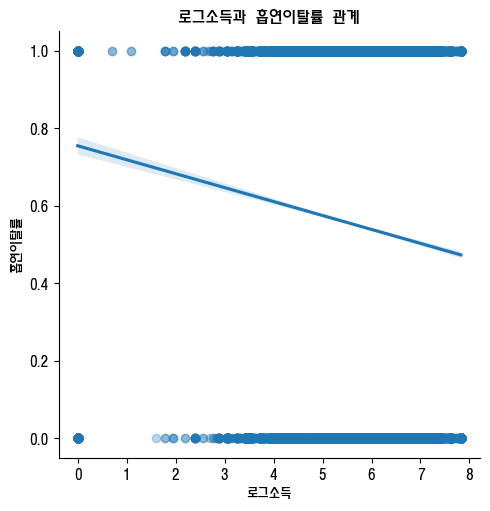

In [48]:
# 결측 제거 및 로그 변환
df_income = df[['fma_14z1_add', 'churn']].dropna()
df_income['log_income'] = np.log1p(df_income['fma_14z1_add'])

plt.figure(figsize=(6,3))
sns.lmplot(data=df_income, x='log_income', y='churn', scatter_kws={'alpha':0.3})
plt.title('로그소득과 흡연이탈률 관계')
plt.xlabel('로그소득')
plt.ylabel('흡연이탈률')
plt.show()

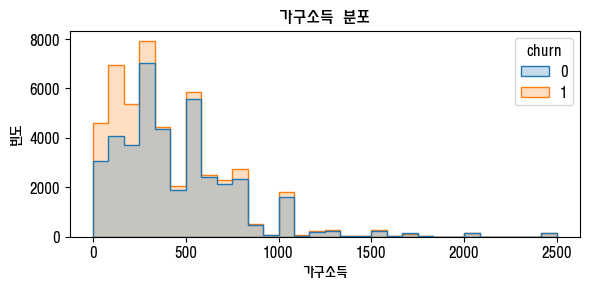

In [61]:
plt.figure(figsize=(6,3))
sns.histplot(data=df, x='fma_14z1_add', bins=30, hue='churn', element='step')

plt.title('가구소득 분포')
plt.xlabel('가구소득')
plt.ylabel('빈도')
plt.tight_layout()
plt.show()

,소득구간,흡연이탈률
0,1.0,0.565186
1,2.0,0.603878
2,3.0,0.631241
3,4.0,0.559625
4,5.0,0.522963
5,6.0,0.513508
6,7.0,0.513061
7,8.0,0.524348


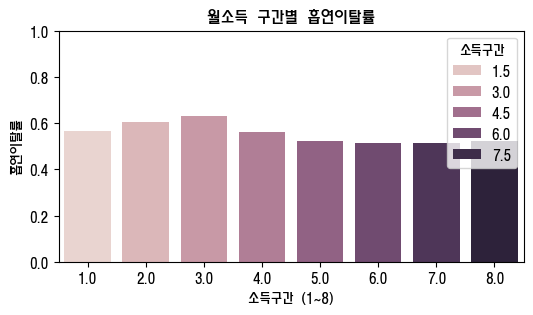

In [39]:
# 월소득 구간별 흡연이탈률
h2 = df.groupby('fma_14z1_group')['churn'].mean().reset_index()
h2.columns = ['소득구간', '흡연이탈률']
display(h2)

plt.figure(figsize=(6,3))
sns.barplot(data=h2, x='소득구간', y='흡연이탈률', hue='소득구간')
plt.title('월소득 구간별 흡연이탈률')
plt.xlabel('소득구간 (1~8)')
plt.ylabel('흡연이탈률')
plt.ylim(0, 1)
plt.show()

# qcut은 전체중 고른 분포로 월소득 상대적 흡연이탈률 확인
# 소득이 높아질수록 흡연이탈률이 감소하는 경향(고소득층일수록 낮음)
# group은 실제 월소득 수준별 절대적 흡연이탈률 확인
# group 그래프에서는 1~3구간에서 다소 높은 이탈률, 이후 구간은 큰 차이 없음

# 정리) 상대적소득기준으로는 고소득층의 흡연이탈률이 낮게 나타났지만
# 절대금액기준으로 보면 일정 소득 이상에서는 큰 차이가 없으며, 1~3구간에서 이탈률이 상대적으로 높음 
# 그런즉슨 흡연이탈률은 상대적소득차이보다 저소득여부에 더 민감하게 반응할 가능성이 높음

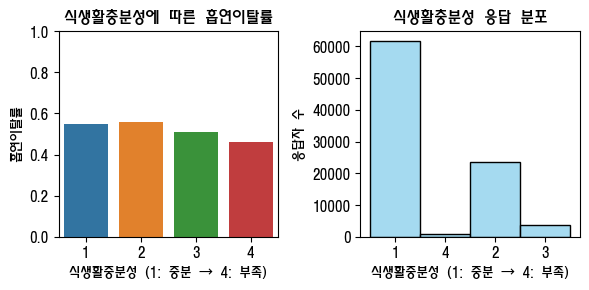

In [21]:
# 식생활이 불안정할수록(1 -> 4) 흡연이탈률(금연성공률)은 낮아질 것이다
# df['nue_01z1'] = df['nue_01z1'].replace({7: np.nan, 9: np.nan})
filtered_df = df[~df['nue_01z1'].isin(['7', '9'])]

h1 = (
    filtered_df.groupby('nue_01z1')['churn']
      .mean()
      .reset_index()
      .rename(columns={'nue_01z1':'식생활충분성', 'churn':'흡연이탈률'})
)

plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
sns.barplot(data=h1, x='식생활충분성', y='흡연이탈률', hue='식생활충분성')
plt.title('식생활충분성에 따른 흡연이탈률')
plt.xlabel('식생활충분성 (1: 충분 → 4: 부족)')
plt.ylabel('흡연이탈률')
plt.ylim(0, 1)

plt.subplot(1, 2, 2)
sns.histplot(data=filtered_df, x='nue_01z1', bins=4, discrete=True, color='skyblue')
plt.title('식생활충분성 응답 분포')
plt.xlabel('식생활충분성 (1: 충분 → 4: 부족)')
plt.ylabel('응답자 수')

plt.tight_layout()
plt.show()

# 식생활이 충분할수록 흡연이탈률이 약간 높고, 
# 식생활이 불충분할수록 낮은 경향을 보임 
# >> 식생활 안정성이 금연성공에 긍정적 영향을 줄 가능성

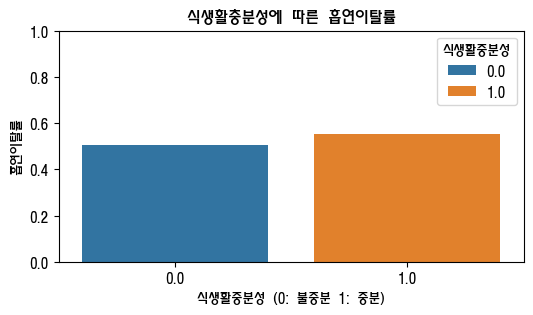

In [ ]:
df['food_stable'] = np.where(df['nue_01z1'].isin(['1', '2']), 1, np.where(df['nue_01z1'].isin(['3', '4']), 0, np.nan))
df['food_stable'].value_counts()

h1 = (
    df.groupby('food_stable')['churn']
      .mean()
      .reset_index()
      .rename(columns={'food_stable':'식생활충분성', 'churn':'흡연이탈률'})
)

plt.figure(figsize=(6,3))
sns.barplot(data=h1, x='식생활충분성', y='흡연이탈률', hue='식생활충분성')
plt.title('식생활충분성에 따른 흡연이탈률')
plt.xlabel('식생활충분성 (0: 불충분 1: 충분)')
plt.ylabel('흡연이탈률')
plt.ylim(0, 1)
plt.show()

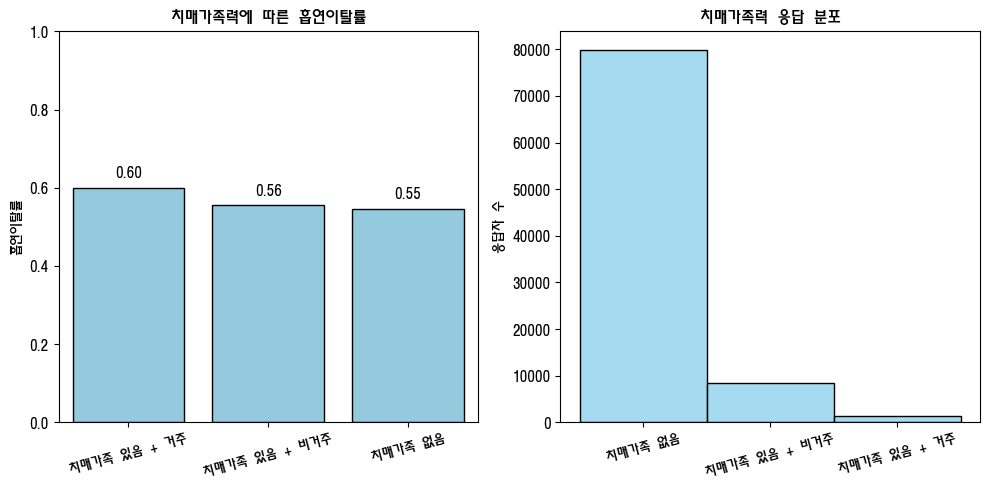

In [34]:
# 치매환자 가족이 있는 가구는 건강에 대한 인식이 높아 흡연이탈률이 더 높을 것이다.
def get_dementia_case(row):
    if row['fma_27z1'] == '1' and row['fma_26z1'] == '1':
        return '1' # 치매가족 있음 + 같이 거주
    elif row['fma_27z1'] == '1' and row['fma_26z1'] == '2':
        return '2' # 치매가족 있음 + 비거주
    elif row['fma_27z1'] == '2':
        return '3' # 치매가족 없음
    else:
        return np.nan

df['fma_dementia_case'] = df.apply(get_dementia_case, axis=1)
filtered_df = df.dropna(subset=['fma_dementia_case'])

h1 = (
    filtered_df.groupby('fma_dementia_case')['churn']
    .mean()
    .reset_index()
    .rename(columns={'fma_dementia_case': '치매가족력', 'churn': '흡연이탈률'})
)

label_map = {
    '1': '치매가족 있음 + 거주',
    '2': '치매가족 있음 + 비거주',
    '3': '치매가족 없음'
}
h1['치매가족력'] = h1['치매가족력'].map(label_map)
filtered_df['fma_dementia_case'] = filtered_df['fma_dementia_case'].map(label_map)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.barplot(data=h1, x='치매가족력', y='흡연이탈률', color='skyblue', edgecolor='black')
plt.title('치매가족력에 따른 흡연이탈률')
plt.xlabel('')
plt.ylabel('흡연이탈률')
plt.xticks(rotation=15)
plt.ylim(0, 1)
for i, rate in enumerate(h1['흡연이탈률']):
    plt.text(i, rate + 0.02, f"{rate:.2f}", ha='center', va='bottom', fontsize=10)

plt.subplot(1, 2, 2)
sns.histplot(data=filtered_df, x='fma_dementia_case', discrete=True, color='skyblue', edgecolor='black')
plt.title('치매가족력 응답 분포')
plt.xlabel('')
plt.ylabel('응답자 수')
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

# 치매환자 가족과 함께 사는 가구일수록 흡연이탈률이 다소 높은 경향 > 건강에 대한 경각심 

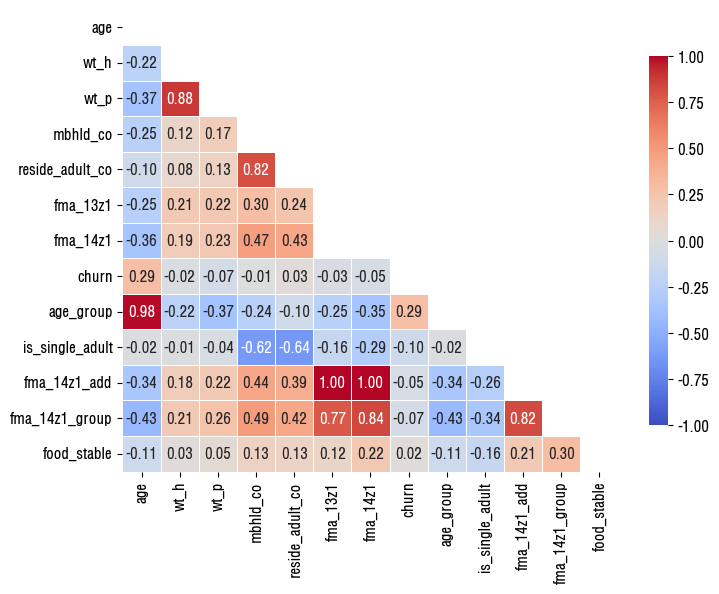

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[num_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(8,6))
sns.heatmap(
    corr,
    mask=mask,                
    annot=True,                
    fmt=".2f",                 
    cmap="coolwarm",
    vmin=-1, 
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.show()

In [ ]:
# mbhld_co_iqr, fma_14z1_add, fma_14z1_log
# age_group, is_singlee_adult, food_stable, fma_dementia_cas, fma_14z1_group, income_q, log_income